# Supervised Learning Final Assignment DS3

#### Author : M.S. Hossain, Master student Data Science for Life Sciences.
#### University : Hanze University of Applied Sciences, Gorningen, Netherlands
#### Student number: 436908
#### Course Teacher : Bart Barnard, Hanze University of Applied Sciences

In [1]:
#imports
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import IFrame
from IPython.display import Image
import seaborn as sns
from prettytable import PrettyTable
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, ShuffleSplit
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Description of Dataset

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient.

Dataset Link: http://archive.ics.uci.edu/ml/datasets/Parkinsons
Research Paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5434464/

Based on few other research Jitter and Shimmer are one of the most useful measures which has been used for the description of pathological voice quality. Over the course of Parkinson's disease many individuals lose the ability to speak or suffer with one or other speech problems. In this dataset various speech recognition factors have been measured, the goal of this assignment is to build a supervised machine learning model and comapre various techniques to find out which model works the best.

The Parkinsonian voice has been described qualitatively as breathy, rough, hoarse, tremulous, abnormally pitched, having reduced pitch range, and unusually quiet <a href="https://pubmed.ncbi.nlm.nih.gov/10963022/" target="_blank">(Holmes, Oates, Phyland, & Hughes, 2000)</a>


# Data Preparation, Exploration and Analysis

#### Data Loading

In [2]:
parkinsons = pd.read_table('parkinsons.data',sep=',')

In [30]:
profile = ProfileReport(parkinsons, minimal=True)
profile.to_file("parkinsons.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
parkinsons.head(10)

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5  phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6  phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7  phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8  phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9  phon_R01_S02_4       95.056       120.103        91.226         0.00532   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   
5           0.00008   0.00463   0.00750     0.01388       0.04701  ...   
6           0.00003   0.00155   0.00202     0.00466       0.01608  ...   
7           0.00003   0.00144   0.00182     0.00431       0.01567  ...   
8           0.00006   0.00293   0.00332     0.00880       0.02093  ...   
9           0.00006   0.00268   0.00332     0.00803       0.02838  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   
5      0.06985  0.01222  21.378       1  0.415564  0.825069 -4.242867   
6      0.02337  0.00607  24.886       1  0.596040  0.764112 -5.634322   
7      0.02487  0.00344  26.892       1  0.637420  0.763262 -6.167603   
8      0.03218  0.01070  21.812       1  0.615551  0.773587 -5.498678   
9      0.04324  0.01022  21.862       1  0.547037  0.798463 -5.011879   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  
5  0.299111  2.187560  0.357775  
6  0.257682  1.854785  0.211756  
7  0.183721  2.064693  0.163755  
8  0.327769  2.322511  0.231571  
9  0.325996  2.432792  0.271362  

[10 rows x 24 columns]

In [32]:
parkinsons.shape

(195, 24)

#### Data types
For classification all the data type of all the features need to be numeric.

In [33]:
parkinsons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In this case each feature is numeric and can therefore be used for classification

#### Missing Values

In [34]:
parkinsons.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

This data set does not contain any missing values, so no action has to be taken.

In [35]:
print('Number of Features In Dataset :', parkinsons.shape[1])
print('Number of Instances In Dataset : ', parkinsons.shape[0])

Number of Features In Dataset : 24
Number of Instances In Dataset :  195


In [36]:
# check how many subjects participated
subs = parkinsons.apply(lambda x: x['name'][:-2], axis = 1)
print(subs.unique())
print(len(subs.unique()))

['phon_R01_S01' 'phon_R01_S02' 'phon_R01_S04' 'phon_R01_S05'
 'phon_R01_S06' 'phon_R01_S07' 'phon_R01_S08' 'phon_R01_S10'
 'phon_R01_S13' 'phon_R01_S16' 'phon_R01_S17' 'phon_R01_S18'
 'phon_R01_S19' 'phon_R01_S20' 'phon_R01_S21' 'phon_R01_S22'
 'phon_R01_S24' 'phon_R01_S25' 'phon_R01_S26' 'phon_R01_S27'
 'phon_R01_S31' 'phon_R01_S32' 'phon_R01_S33' 'phon_R01_S34'
 'phon_R01_S35' 'phon_R01_S37' 'phon_R01_S39' 'phon_R01_S42'
 'phon_R01_S43' 'phon_R01_S44' 'phon_R01_S49' 'phon_R01_S50']
32


In [37]:
# check if there are participants with divergent number of recordings compared to others
print(f'The minimum recordings per subject is {subs.value_counts().min()}, the maximum is {subs.value_counts().max()}')

The minimum recordings per subject is 6, the maximum is 7


There are 195 voice recordings of 32 unique subjects

In [38]:
# check whether there is strange data in the status
parkinsons['status'].unique()

array([1, 0], dtype=int64)

As the first column of data contains name and recording number, I thought it is a good idea to split the name and recording
number, just in case it might be beneficial for future groupings


In [3]:
parkinsons.insert(1, 'Recording',0)
#splitting the data with last underscore
parkinsons[['name','Recording']] = parkinsons.name.str.rsplit('_', 1, expand=True)

Copying status column to new Status column at 3rd location for better visibility and understanding of the dataset

In [4]:
parkinsons.insert(2, 'Status',parkinsons['status'])

Dropping the redundant old status column

In [5]:
parkinsons = parkinsons.drop(['status'], axis=1)

In [6]:
parkinsons.columns

Index(['name', 'Recording', 'Status', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)',
       'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP',
       'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)',
       'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR',
       'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [43]:
# Checking duplicate rows
print('Number of Duplicate Rows :',parkinsons.duplicated().sum())

Number of Duplicate Rows : 0


In [7]:
#Final dataframe
parkinsons.head()

name Recording  Status  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  \
0  phon_R01_S01         1       1      119.992       157.302        74.997   
1  phon_R01_S01         2       1      122.400       148.650       113.819   
2  phon_R01_S01         3       1      116.682       131.111       111.555   
3  phon_R01_S01         4       1      116.676       137.871       111.366   
4  phon_R01_S01         5       1      116.014       141.781       110.655   

   MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  ...  MDVP:APQ  \
0         0.00784           0.00007   0.00370   0.00554  ...   0.02971   
1         0.00968           0.00008   0.00465   0.00696  ...   0.04368   
2         0.01050           0.00009   0.00544   0.00781  ...   0.03590   
3         0.00997           0.00009   0.00502   0.00698  ...   0.03772   
4         0.01284           0.00011   0.00655   0.00908  ...   0.04465   

   Shimmer:DDA      NHR     HNR      RPDE       DFA   spread1   spread2  \
0      0.06545  0.02211  21.033  0.414783  0.815285 -4.813031  0.266482   
1      0.09403  0.01929  19.085  0.458359  0.819521 -4.075192  0.335590   
2      0.08270  0.01309  20.651  0.429895  0.825288 -4.443179  0.311173   
3      0.08771  0.01353  20.644  0.434969  0.819235 -4.117501  0.334147   
4      0.10470  0.01767  19.649  0.417356  0.823484 -3.747787  0.234513   

         D2       PPE  
0  2.301442  0.284654  
1  2.486855  0.368674  
2  2.342259  0.332634  
3  2.405554  0.368975  
4  2.332180  0.410335  

[5 rows x 25 columns]

In [46]:
# The data descriptions from the parkinsons.names file.
description = pd.read_table('parkinsons.names', error_bad_lines=False, warn_bad_lines=False)
description = description.iloc[34:47].reset_index().drop(['index'], axis=1)

In [47]:
description

Title: Parkinsons Disease Data Set
0                 Matrix column entries (attributes):
1      name - ASCII subject name and recording number
2   MDVP:Fo(Hz) - Average vocal fundamental frequency
3   MDVP:Fhi(Hz) - Maximum vocal fundamental frequ...
4   MDVP:Flo(Hz) - Minimum vocal fundamental frequ...
5   MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:...
6      measures of variation in fundamental frequency
7   MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shi...
8   NHR,HNR - Two measures of ratio of noise to to...
9   status - Health status of the subject (one) - ...
10  RPDE,D2 - Two nonlinear dynamical complexity m...
11              DFA - Signal fractal scaling exponent
12  spread1,spread2,PPE - Three nonlinear measures...

In [48]:
#Basic data exploration, checking for NAN, shape and size

#Size of data
print(f'Size of data : {parkinsons.size}')
#Shape of data
print(f'Shape of data : {parkinsons.shape}')
#Null values
print(f'Number of null values: {parkinsons.isnull().sum().sum()}')


#Exploring the dataset to check how many pateint records are there with parkinsons
healthy = (parkinsons['Status'] == 0).sum()
print(f'Number of pateint records without parkinsons: {healthy}')
unhealthy = (parkinsons['Status'] == 1).sum()
print(f'Number of pateint records with parkinsons: {unhealthy}')

# first 3 columns are name, recording and status, we check for features after 3rd column
print(f'Number of features: {len(parkinsons.columns[3:])}')

Size of data : 4875
Shape of data : (195, 25)
Number of null values: 0
Number of pateint records without parkinsons: 48
Number of pateint records with parkinsons: 147
Number of features: 22


Using describe to check the spread of values over the dataset. Let me elaborate the output w.r.t each columns:
- count: total no. of data entries
- mean: mean of all the values (does not work for character/string columns)
- std: standard deviation i.e dispersion from mean
- min: smallest value
- 25%: 25% of all your values are below that value
- 50%: 50% of all your values are below that value (this is also the median of the column)
- 75%: 75% of all your values are below that value (for 100 data entries in a columsn 25%, 50% and 75% will give 25th, 50th and 75th value)
- max: largest value 

Though the data seems to be highly dispersed over a wide range of
numbers. I choose not to normalise the dataset becuase of 2 reasons. First, before taking the measurements for individuals the
amplitude of each signal has already been digitally normalized in order to suppress the effects of 
individual difference. Second, not all features are measured over same scale, Amplitude is 
measured in Hz(hertz), Jitter in percentage and Shimmer in dB(decibel.) and so on. Normalising it will scale it down to a 
similar scale and as the dataset is itself very small, there might be a situation where after normalisation we can lose 
some important data.

In [49]:
parkinsons.describe()

Status  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count  195.000000   195.000000    195.000000    195.000000      195.000000   
mean     0.753846   154.228641    197.104918    116.324631        0.006220   
std      0.431878    41.390065     91.491548     43.521413        0.004848   
min      0.000000    88.333000    102.145000     65.476000        0.001680   
25%      1.000000   117.572000    134.862500     84.291000        0.003460   
50%      1.000000   148.790000    175.829000    104.315000        0.004940   
75%      1.000000   182.769000    224.205500    140.018500        0.007365   
max      1.000000   260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       ...    MDVP:APQ  Shimmer:DDA         NHR         HNR        RPDE  \
count  ...  195.000000   195.000000  195.000000  195.000000  195.000000   
mean   ...    0.024081     0.046993    0.024847   21.885974    0.498536   
std    ...    0.016947     0.030459    0.040418    4.425764    0.103942   
min    ...    0.007190     0.013640    0.000650    8.441000    0.256570   
25%    ...    0.013080     0.024735    0.005925   19.198000    0.421306   
50%    ...    0.018260     0.038360    0.011660   22.085000    0.495954   
75%    ...    0.029400     0.060795    0.025640   25.075500    0.587562   
max    ...    0.137780     0.169420    0.314820   33.047000    0.685151   

              DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

To check the distribution on status over dataset, a boxplot is shown.. It clearly shows that we have very less data
for individuals with parkinsons and individuals not with parkinson. 0 implies indivduals not having parkinsons and
Status of 1 implies individuals with parkinsons


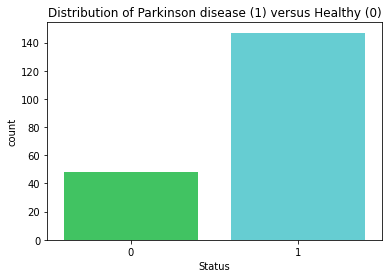

In [9]:
count = sns.countplot(x=parkinsons['Status'], label= 'Count',  palette=['#2BD957', '#54DEE4']).set(title = 'Distribution of Parkinson disease (1) versus Healthy (0)')

In [51]:
#Defining columns for heatmap
cols = ['Status','MDVP:Fo(Hz)','MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 
        'Jitter:DDP','MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'NHR', 
        'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2','PPE']

I wanted to check how the data is co-related so first option was to create a pairplot for all the features with respect to Status column of parkinsons dataframe

Orange color in the distribution refers to pateinst with status 1 i.e. having Parkinsons and blue with status 0 i.e. Healthy.
As, the data is not evenly 


<Figure size 1440x1440 with 0 Axes>

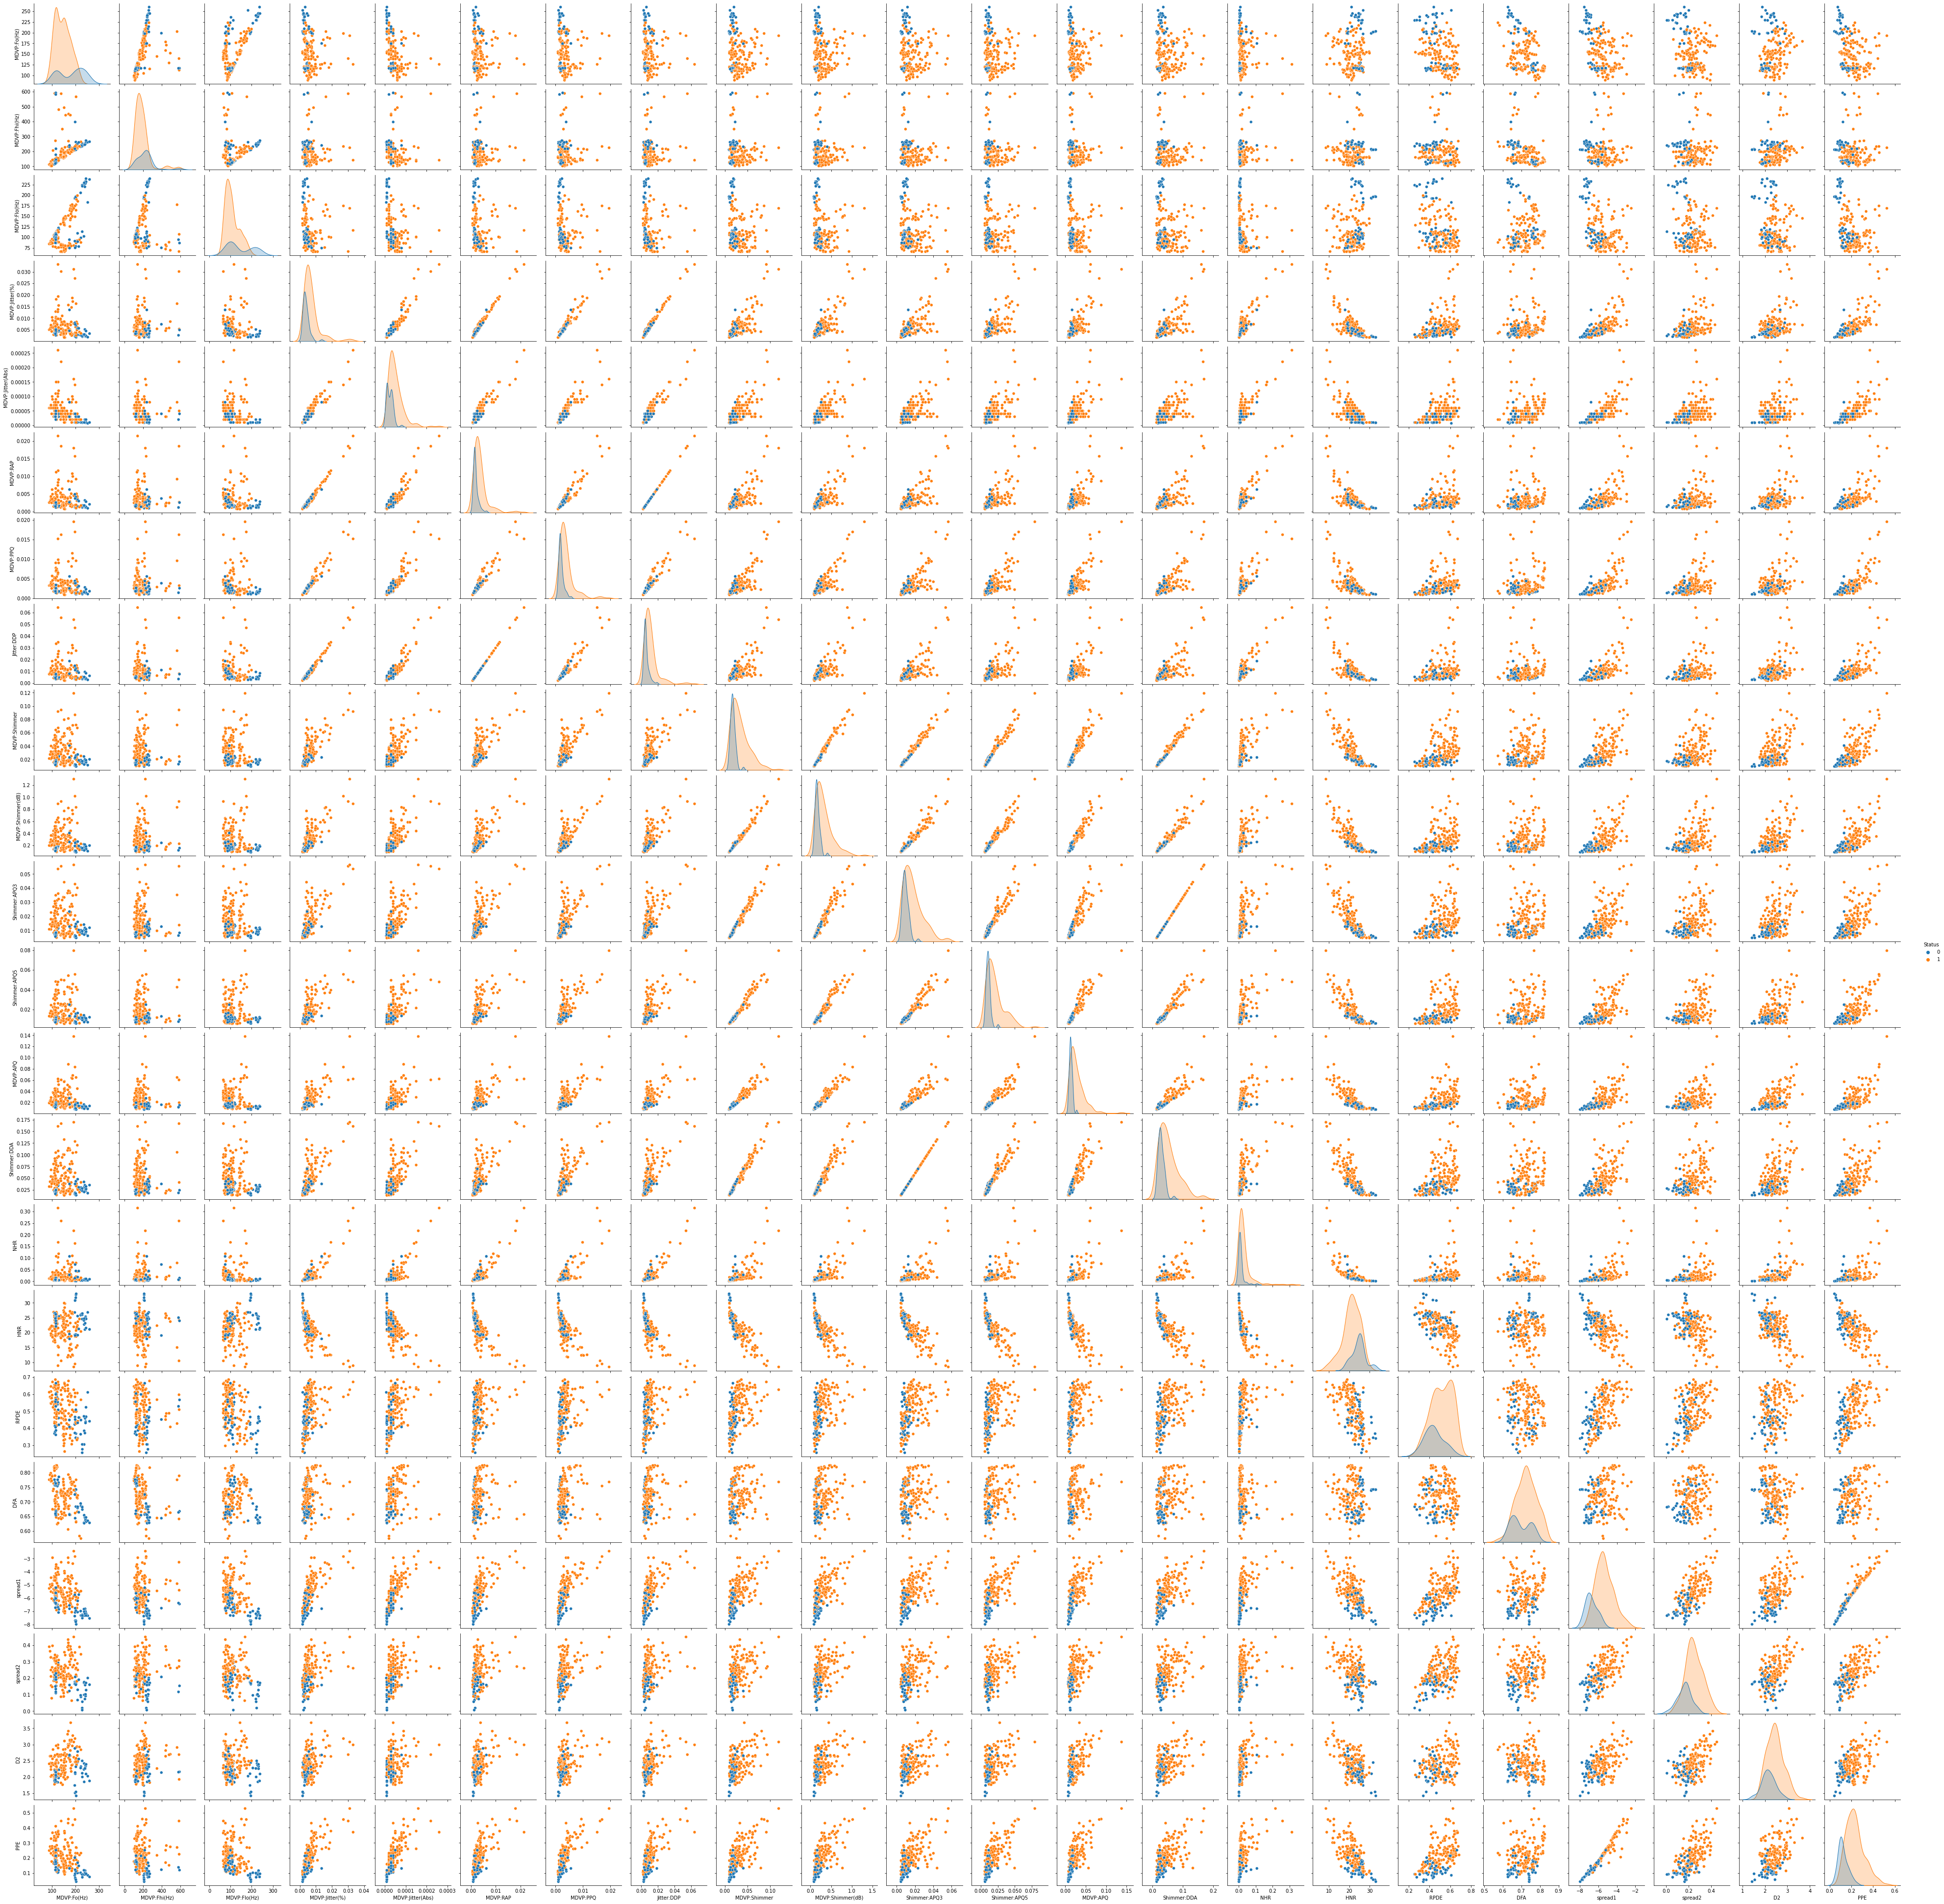

In [24]:
# setting figsize
plt.figure(figsize=(20, 20))
sns.pairplot(data=parkinsons[cols],hue = 'Status')
plt.savefig('parkinsonspairplot.png',format='png')

#For greater visibility the image is stored so that it can be zoomed in

In [28]:
#Image(filename='parkinsonspairplot.png')

Second option to check the corelation between featrues was to plot a heatmap.



Values which are closer to -1 shows that there is no linear corelation between the 2 factors. Whereas, the values which are
closer to one shows that the features are directly proportional to the each other (If there is an incrase in value of one
feature the other value also increases). In this plot below, the darker the image the greater is the co-relation.

We can see 2 dark blue squares in the heatmap below they are because of the fact that they are plotted against the similar
measures. The first blue block at left can be seen for values of Jitter which are highly co-related between each other.
Similarly, the second blue block is for measures of shimmer.

A corelation score of greater than 0.6 is what we are looking for in the heatmap below, but as can be seen we have a huge 
number of relations to describe for this heatmap. I have selected two of them to give a probable description of the relations.

- NHR - MDVP Jitter% : (0.91)
  NHR is the ratio of Noise to Harmonic Ratio. And Jitter is the modulation of periodicity of voice signals.
  A high degree of jitter results in hoarseness and this can explains well that NHR to be higher and ratio of HNR to be lower 
  which is the exact opposite of NHR. A lower NHR and higher HNR implies greater noise quality i.e with less jitter. Hence,
  jitter is directly proportional to NHR and inversely proportional to HNR.
 
  
- PPE - spread1 : (0.96)
  PPE represents the inefficiency of voice frequency control.There is a high co-relation score between PPE(pitch period entropy)
  and spread 1 which is one of the measures of non-linear fundamental frequency variation. I cannot find why and how they are
  co-related but few more reads and digging into details might give some insight.



In [52]:
parkinsons.corr()

Status  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  \
Status            1.000000    -0.383535     -0.166136     -0.380200   
MDVP:Fo(Hz)      -0.383535     1.000000      0.400985      0.596546   
MDVP:Fhi(Hz)     -0.166136     0.400985      1.000000      0.084951   
MDVP:Flo(Hz)     -0.380200     0.596546      0.084951      1.000000   
MDVP:Jitter(%)    0.278220    -0.118003      0.102086     -0.139919   
MDVP:Jitter(Abs)  0.338653    -0.382027     -0.029198     -0.277815   
MDVP:RAP          0.266668    -0.076194      0.097177     -0.100519   
MDVP:PPQ          0.288698    -0.112165      0.091126     -0.095828   
Jitter:DDP        0.266646    -0.076213      0.097150     -0.100488   
MDVP:Shimmer      0.367430    -0.098374      0.002281     -0.144543   
MDVP:Shimmer(dB)  0.350697    -0.073742      0.043465     -0.119089   
Shimmer:APQ3      0.347617    -0.094717     -0.003743     -0.150747   
Shimmer:APQ5      0.351148    -0.070682     -0.009997     -0.101095   
MDVP:APQ          0.364316    -0.077774      0.004937     -0.107293   
Shimmer:DDA       0.347608    -0.094732     -0.003733     -0.150737   
NHR               0.189429    -0.021981      0.163766     -0.108670   
HNR              -0.361515     0.059144     -0.024893      0.210851   
RPDE              0.308567    -0.383894     -0.112404     -0.400143   
DFA               0.231739    -0.446013     -0.343097     -0.050406   
spread1           0.564838    -0.413738     -0.076658     -0.394857   
spread2           0.454842    -0.249450     -0.002954     -0.243829   
D2                0.340232     0.177980      0.176323     -0.100629   
PPE               0.531039    -0.372356     -0.069543     -0.340071   

                  MDVP:Jitter(%)  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  \
Status                  0.278220          0.338653  0.266668  0.288698   
MDVP:Fo(Hz)            -0.118003         -0.382027 -0.076194 -0.112165   
MDVP:Fhi(Hz)            0.102086         -0.029198  0.097177  0.091126   
MDVP:Flo(Hz)           -0.139919         -0.277815 -0.100519 -0.095828   
MDVP:Jitter(%)          1.000000          0.935714  0.990276  0.974256   
MDVP:Jitter(Abs)        0.935714          1.000000  0.922911  0.897778   
MDVP:RAP                0.990276          0.922911  1.000000  0.957317   
MDVP:PPQ                0.974256          0.897778  0.957317  1.000000   
Jitter:DDP              0.990276          0.922913  1.000000  0.957319   
MDVP:Shimmer            0.769063          0.703322  0.759581  0.797826   
MDVP:Shimmer(dB)        0.804289          0.716601  0.790652  0.839239   
Shimmer:APQ3            0.746625          0.697153  0.744912  0.763580   
Shimmer:APQ5            0.725561          0.648961  0.709927  0.786780   
MDVP:APQ                0.758255          0.648793  0.737455  0.804139   
Shimmer:DDA             0.746635          0.697170  0.744919  0.763592   
NHR                     0.906959          0.834972  0.919521  0.844604   
HNR                    -0.728165         -0.656810 -0.721543 -0.731510   
RPDE                    0.360673          0.441839  0.342140  0.333274   
DFA                     0.098572          0.175036  0.064083  0.196301   
spread1                 0.693577          0.735779  0.648328  0.716489   
spread2                 0.385123          0.388543  0.324407  0.407605   
D2                      0.433434          0.310694  0.426605  0.412524   
PPE                     0.721543          0.748162  0.670999  0.769647   

                  Jitter:DDP  MDVP:Shimmer  ...  MDVP:APQ  Shimmer:DDA  \
Status              0.266646      0.367430  ...  0.364316     0.347608   
MDVP:Fo(Hz)        -0.076213     -0.098374  ... -0.077774    -0.094732   
MDVP:Fhi(Hz)        0.097150      0.002281  ...  0.004937    -0.003733   
MDVP:Flo(Hz)       -0.100488     -0.144543  ... -0.107293    -0.150737   
MDVP:Jitter(%)      0.990276      0.769063  ...  0.758255     0.746635   
MDVP:Jitter(Abs)    0.922913      0.703322  ...  0.648793     0.697170   
MDVP:RAP            

In [53]:
correlation_values = parkinsons.corr()['Status']
correlation_values.abs().sort_values(ascending=False)

Status              1.000000
spread1             0.564838
PPE                 0.531039
spread2             0.454842
MDVP:Fo(Hz)         0.383535
MDVP:Flo(Hz)        0.380200
MDVP:Shimmer        0.367430
MDVP:APQ            0.364316
HNR                 0.361515
Shimmer:APQ5        0.351148
MDVP:Shimmer(dB)    0.350697
Shimmer:APQ3        0.347617
Shimmer:DDA         0.347608
D2                  0.340232
MDVP:Jitter(Abs)    0.338653
RPDE                0.308567
MDVP:PPQ            0.288698
MDVP:Jitter(%)      0.278220
MDVP:RAP            0.266668
Jitter:DDP          0.266646
DFA                 0.231739
NHR                 0.189429
MDVP:Fhi(Hz)        0.166136
Name: Status, dtype: float64

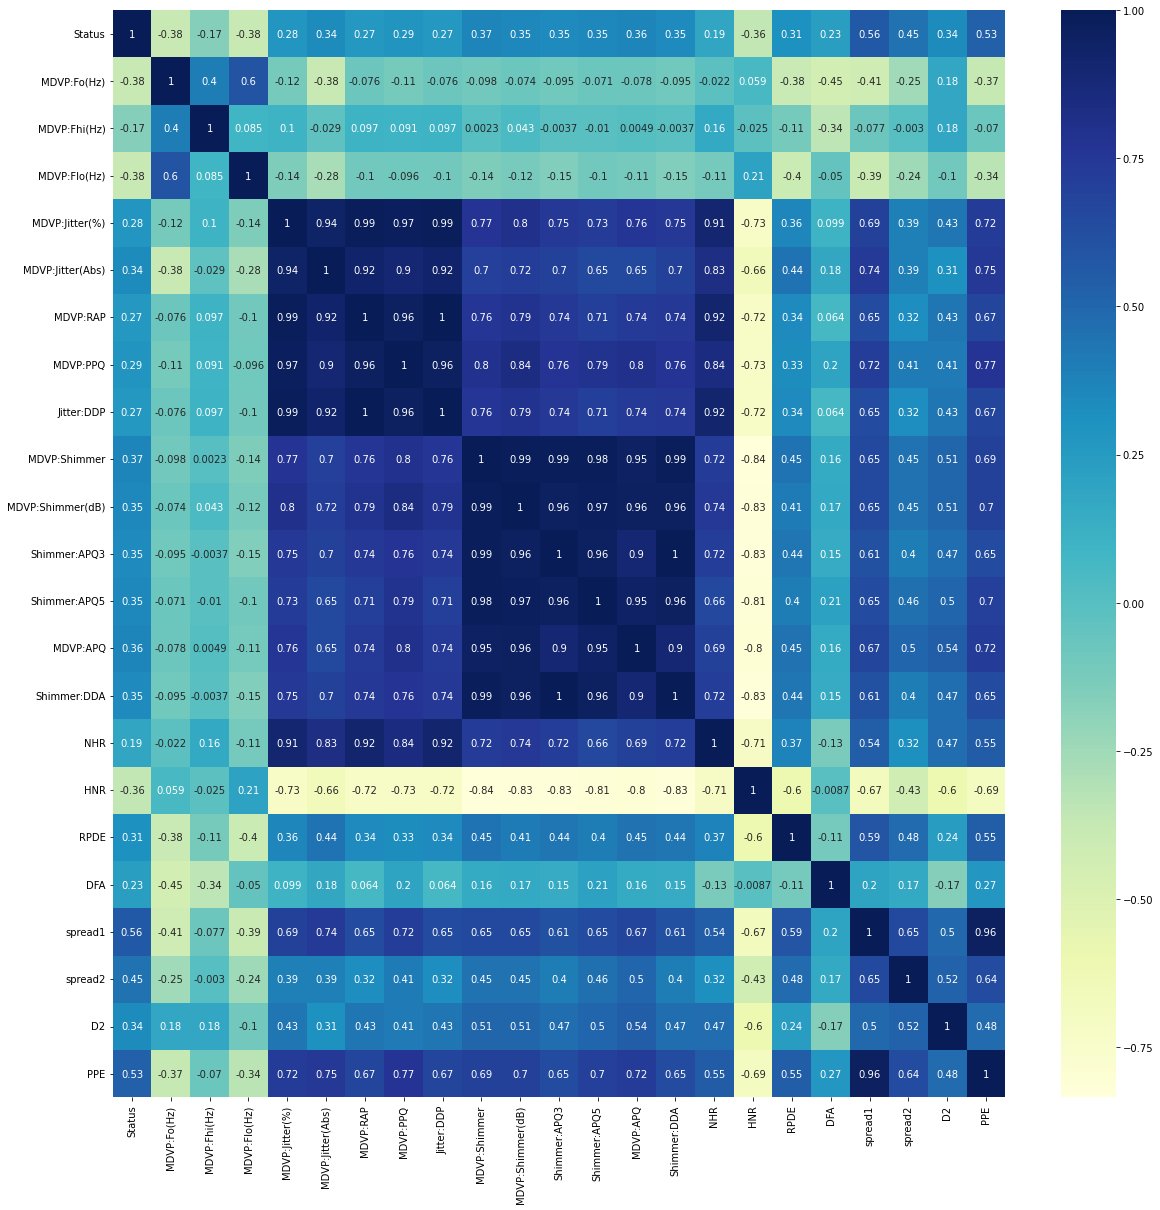

In [54]:
plt.figure(figsize=(20,20))

#Calculating the corelations for the heatmap
c = parkinsons[cols].corr()
sns.heatmap(c,annot=True,cmap="YlGnBu")
plt.show()

<AxesSubplot:>

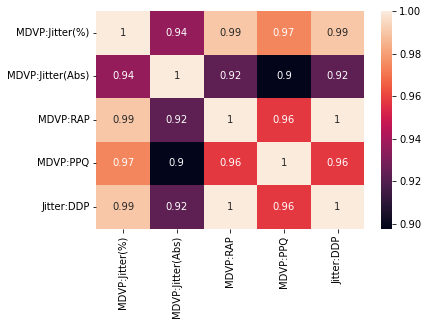

In [57]:
# Plot the paired plots for all variables measuring Jitter
jitter_cols = ['MDVP:Jitter(%)', 
               'MDVP:Jitter(Abs)',
               'MDVP:RAP',
               'MDVP:PPQ',
               'Jitter:DDP']

jitter_c = parkinsons[jitter_cols].corr().abs()
sns.heatmap(jitter_c,annot=True)

<AxesSubplot:>

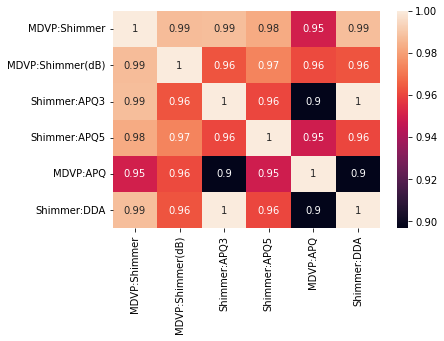

In [58]:
# Plot the paired plots for all variables measuring Jitter
shimmer_cols = ['MDVP:Shimmer',
                'MDVP:Shimmer(dB)',
                'Shimmer:APQ3',
                'Shimmer:APQ5',
                'MDVP:APQ',
                'Shimmer:DDA']

shimmer_c = parkinsons[shimmer_cols].corr().abs()
sns.heatmap(shimmer_c,annot=True)

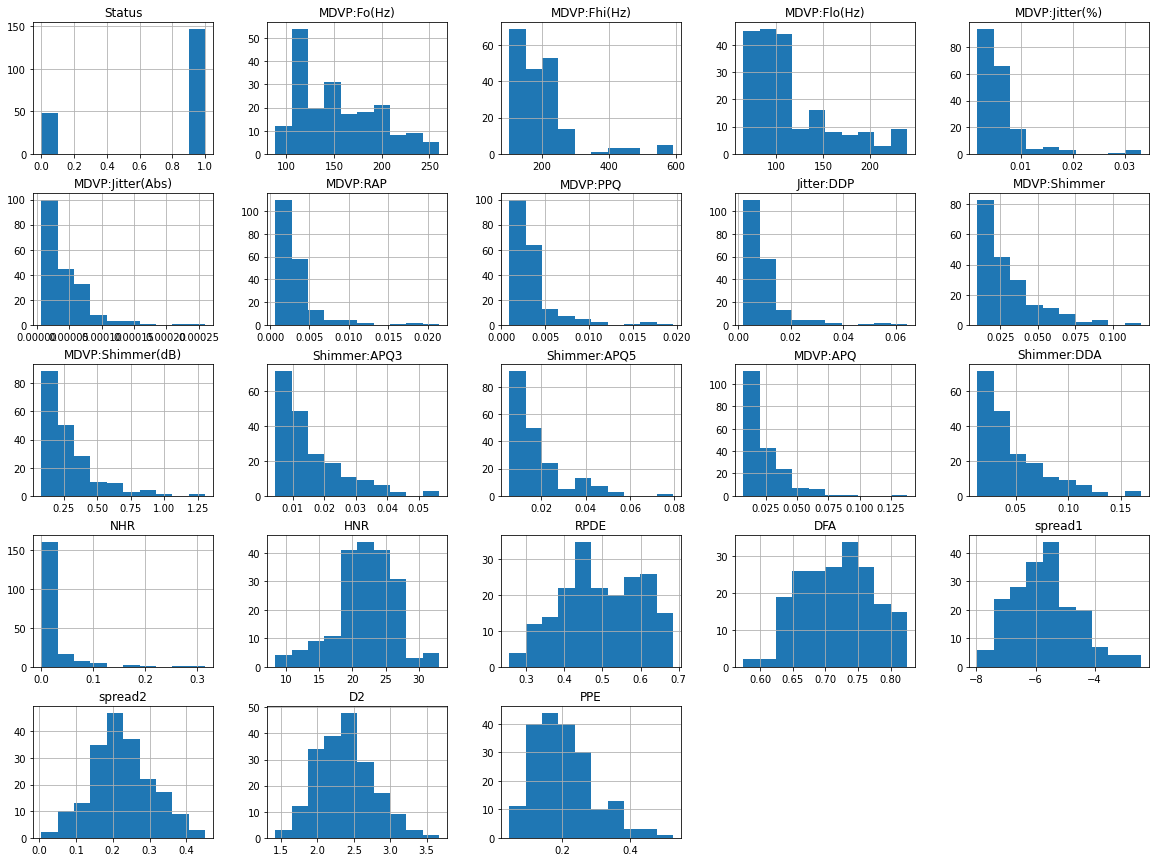

In [59]:
parkinsons.hist(figsize=(20, 15))
plt.show()

In [60]:
# count number of observations in each class
normalp, parkinsonsp = parkinsons['Status'].value_counts()
print('Number of normal individual: ', normalp)
print('Number of individuals with parkinsons : ', parkinsonsp)
print('')
print('% of normal individual ', round(normalp / len(parkinsons) * 100, 2), '%')
print('% of of individuals with parkinsons', round(parkinsonsp / len(parkinsons) * 100, 2), '%')

Number of normal individual:  147
Number of individuals with parkinsons :  48

% of normal individual  75.38 %
% of of individuals with parkinsons 24.62 %


# Trying different clasifier
### Evaluation function for models

The code for model evaluation has been used from: https://github.com/fenna/student_BFVM19DATASC3/blob/main/W03_Ensemble_solution.ipynb

In [61]:
# function to evaluate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

def evaluate(y_test, y_pred, X_test, clf):
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
      
def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    """
    input:
        model:pipeline object
        X_train, y_train: training data
        X_val, y_val: test data
    """
    train_errors, val_errors = [], []
    for m in range(30, len(X_train)): #(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=1, label="training data")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="validation data")
    plt.legend(loc="upper right", fontsize=10)   
    plt.xlabel("Training set size", fontsize=10) 
    plt.ylabel("RMSE", fontsize=10)     
    # compare accuracy train versus test to access overfit 
    print(f'test  acc: {model.score(X_val, y_val)}')
    print(f'train acc: {model.score(X_train, y_train)}')

# Classifier Models
In this notebook I have tried almost all classification models avaialble in sklearn library. I wanted to explore which classifier works best and to play around with the data.

First the data has been split into train, test and validation sets. No normalisation has been done. Justification has already been given. The validation and test scores have been summed up in a summary table at the end of this notebook. However, for each of the scores the plots should always be considered to come to a conclusion as to which method performs best.


1. Logistic regression
2. Decision tree
3. Support vector machine (SVM)
4. Naive Bayes


#### Ensemble Learning
1. Random forest
2. Bagging with Decicion Tree classifier
3. Bagging with KNeighborsClassifier classifier
4. Boosting
5. Stacking
6. Gradient Boosting
7. Voting classifier

#### Neural network model
1. MLP Classifier



## Initialization

#### Select Features

In [62]:
#selecting features after 3rd column
Xs = parkinsons.columns[3:]
ys = parkinsons.columns[2:3]

# set X and y with the above defined columns
X = parkinsons[Xs]
y = parkinsons[ys]

In [63]:
# checking shaped of X and Y if they are same
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (195, 22)
y shape: (195, 1)


#### Split the data

Using the train_test_split function to split the data into train,test and validation. As my dataset is too small. I have decided to keep the test size to 25% and then 10% validation dataset.

In [64]:
from sklearn.model_selection import train_test_split, ShuffleSplit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# also create a validation set from the train set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=0)
print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'X validation shape: {X_val.shape}\n')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')
print(f'y validation shape: {y_val.shape}')

X train shape: (131, 22)
X test shape: (49, 22)
X validation shape: (15, 22)

y train shape: (131, 1)
y test shape: (49, 1)
y validation shape: (15, 1)


#### Check the distribution for all splits

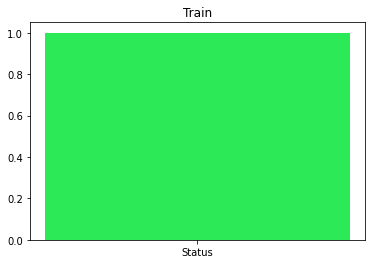

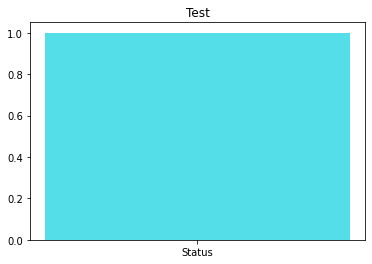

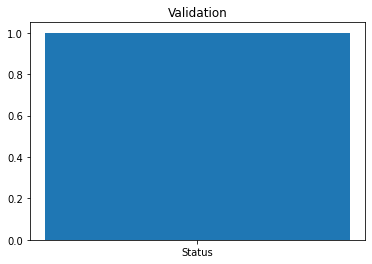

In [65]:
#Checking distribution of train, test and valdiation data
from collections import Counter
plt.bar(Counter(y_train).keys(), Counter(y_train).values(), color='#2BE957')
plt.title('Train')
plt.show()

plt.bar(Counter(y_test).keys(), Counter(y_test).values(), color='#54DEE8')
plt.title('Test')
plt.show()


plt.bar(Counter(y_val).keys(), Counter(y_val).values())
plt.title('Validation')
plt.show()

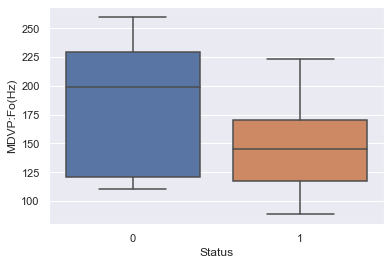

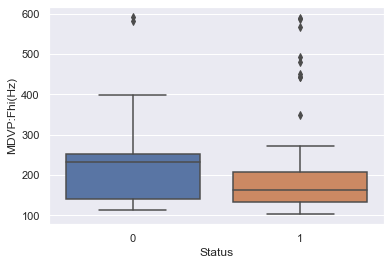

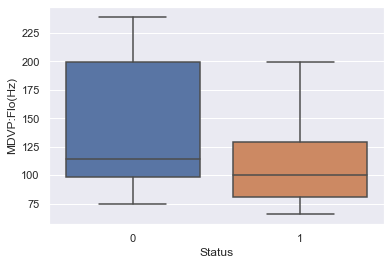

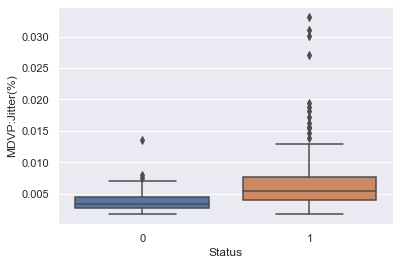

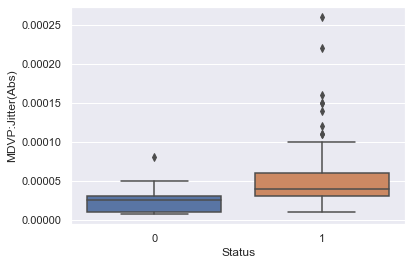

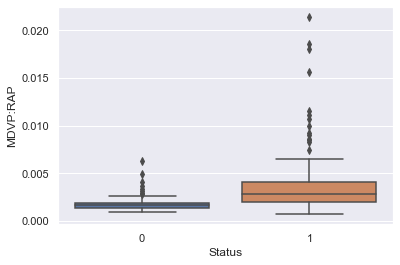

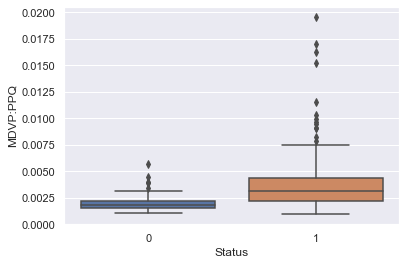

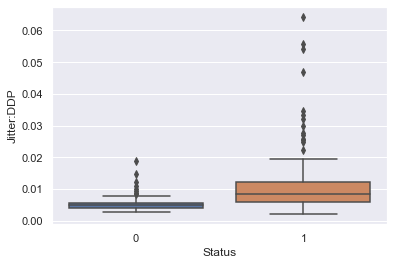

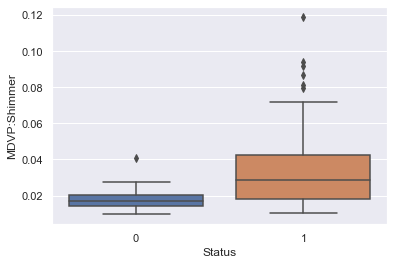

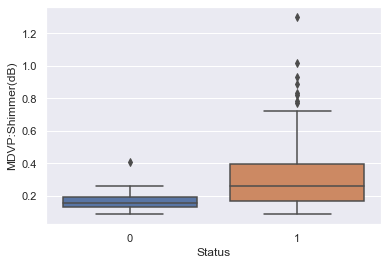

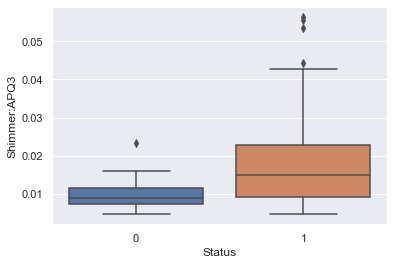

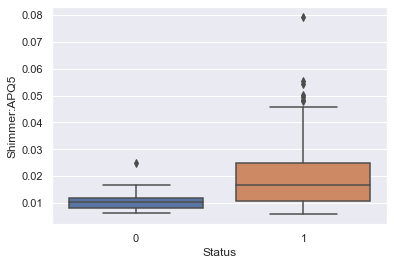

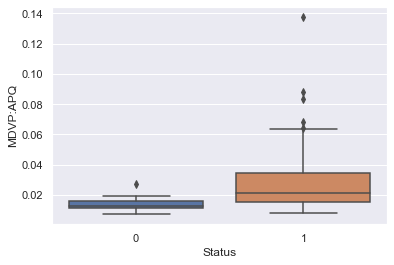

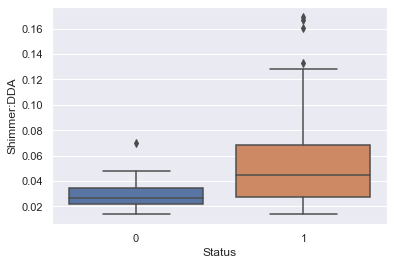

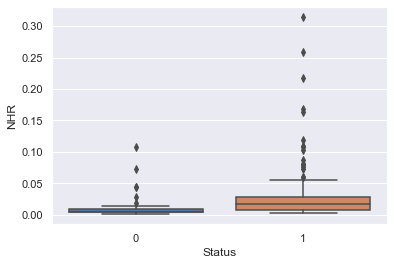

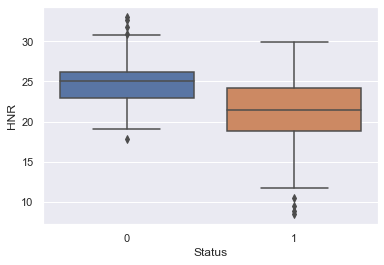

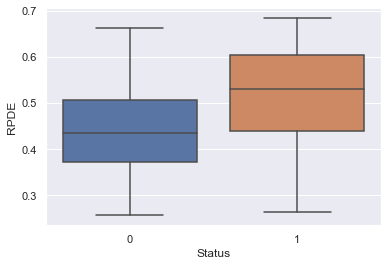

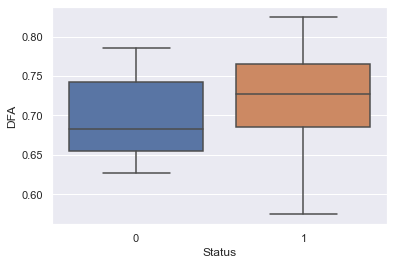

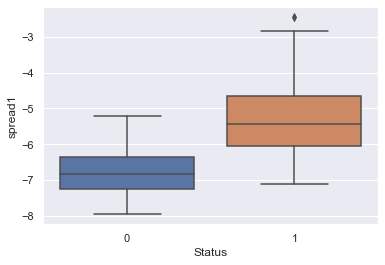

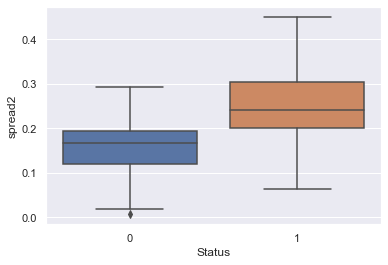

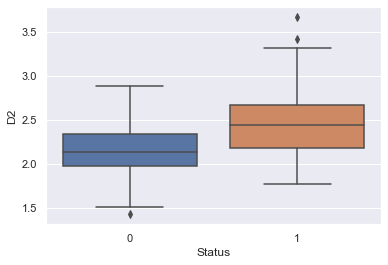

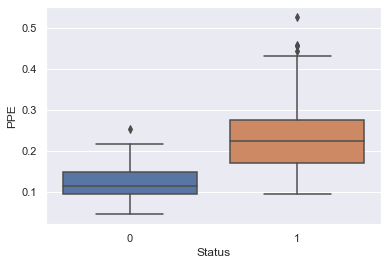

In [66]:
# Plotting boxplots to check the distribution of Status over all features
for column in parkinsons.columns[3:]:   
    sns.set()
    fig, ax = plt.subplots()
    sns.set(style="ticks")
    sns.boxplot(x = 'Status', y = column , data = parkinsons )


#### Defining a summary table to store Training and Testing accuracies of all models

In [67]:
summary = pd.DataFrame(columns = ['Name','Training accuracy', 'Testing accuracy'])

# Logistic Regression


Accuracy of logistic regression on train set 0.86
Accuracy of logistic regression on test set 0.94

[[ 8  3]
 [ 0 38]]
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.93      1.00      0.96        38

    accuracy                           0.94        49
   macro avg       0.96      0.86      0.90        49
weighted avg       0.94      0.94      0.94        49



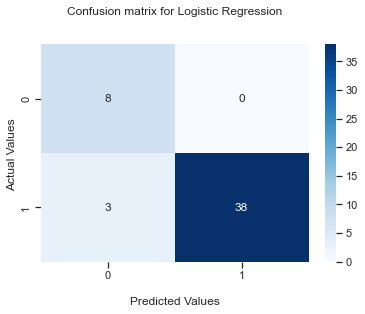

In [68]:
# initialize the model
lg = LogisticRegression(random_state=0)

# fit the model on the train data
lg.fit(X_train, y_train)

# calculate accuracy score on train data
lg_score_train = lg.score(X_train, y_train)
print(f'Accuracy of logistic regression on train set {lg_score_train:.2f}')

# calculate accuracy score on test data
lg_score_test = lg.score(X_test, y_test)
print(f'Accuracy of logistic regression on test set {lg_score_test:.2f}')
print('')


# predict the values and evaluate with precision, recall and f1 
y_pred = lg.predict(X_test)
evaluate(y_test, y_pred, X_test, lg)

ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='Blues')

ax.set_title('Confusion matrix for Logistic Regression\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

Logistic Regression is used to examine the association of (categorical or continuous) independent variable(s) with one dichotomous
dependent variable. It is used for binary classification problem which has only two classes to predict. In our dataset, the 
2 classes are having parkinsons or not. I suspected that this model should work but it is not the perfect model to be used.

Results:<br>
Logistic regression model has a precision of 0.93<br>
Accuracy of 0.94<br>
Recall: 1<br>
f1-score: 0.96 <br>

It has a recall value of 1 which will be perfect in an ideal scenario where every result retrieved by the model is correct.
But in my opinion a score of perfect 1 is not a good thing to acheive. It might be possible if we have a larger dataset, then 
our training and test data might acheieve different results. 


test  acc: 0.9183673469387755
train acc: 0.8778625954198473


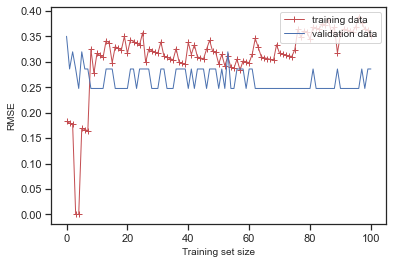

In [69]:
#plotting the learning curve
plot_learning_curves(lg, X_train, y_train, X_test, y_test)

An RMSE score between 0.2 and 0.5 shows that the model can predict the data correctly. In our case both validation and traning
data does seem to acheive a good RMSE score but there is a lot of overfitting.
As can be seen in the plot the model starts to train well after about a size of 5. After around 25-40 the model does start to
converge but after 70 it starts to overfit the data.

In [70]:
#Appending scores in summary table
lgsummary = {'Name':'Logistic Regression','Training accuracy':lg_score_train,'Testing accuracy':lg_score_test}
summary = summary.append(lgsummary, ignore_index=True)


# Decision Tree

In [72]:
# initialize the model
dt = DecisionTreeClassifier()
# fit the model on the train data
dt.fit(X_train, y_train)

DecisionTreeClassifier()

Accuracy of DecisionTree on train set 1.00
Accuracy of DecisionTree on test set 0.92

[[10  1]
 [ 3 35]]
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.97      0.92      0.95        38

    accuracy                           0.92        49
   macro avg       0.87      0.92      0.89        49
weighted avg       0.93      0.92      0.92        49



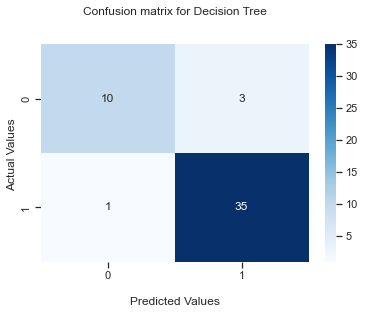

In [73]:
# calculate accuracy score on train data
dt_score_train = dt.score(X_train, y_train)
print(f'Accuracy of DecisionTree on train set {dt_score_train:.2f}')

# calculate accuracy score on test data
dt_score_test = dt.score(X_test, y_test)
print(f'Accuracy of DecisionTree on test set {dt_score_test:.2f}')
print('')
y_pred = dt.predict(X_test)
evaluate(y_test, y_pred, X_test, dt)

ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='Blues')

ax.set_title('Confusion matrix for Decision Tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


Decision trees are used for handling non-linear data sets effectively.Decision trees can be divided into two types;
categorical variable and continuous variable decision trees. It might be a good model to predict house prices based on certain
defined conditions or in civil engineering aspects. But in our case decision tree might not be a good idea as we are 
talking about disease prediction. The major drawback for decision trees is that if there is a slight change in the features of
data the results can change abruptly, and considering that it will be a really bad idea to predict any kind of disease/ diagnosis
based on decision tree. Decision trees are best suited for models where interpretation of data is lesss important than achieving
accuracy.

Our model achieves an accuracy of 0.92, precision of 0.97, a recall of 0.92 and f1-score of 0.95 which are all good in terms of 
statistical terms but as mentioned above a slight change and the model can converge on a negative side.

test  acc: 0.8775510204081632
train acc: 0.9923664122137404


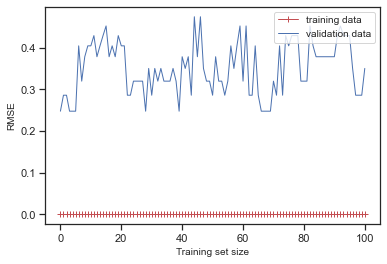

In [74]:
#plotting the learning curve
plot_learning_curves(dt, X_train, y_train, X_test, y_test)

As can be seen in above learning curve there is a huge difference between training and validation data. It starts to overfit
from the beginning and the RMSE score on training data is zero which is a bad indication that this model is not good for 
predicting parkinson's disease.

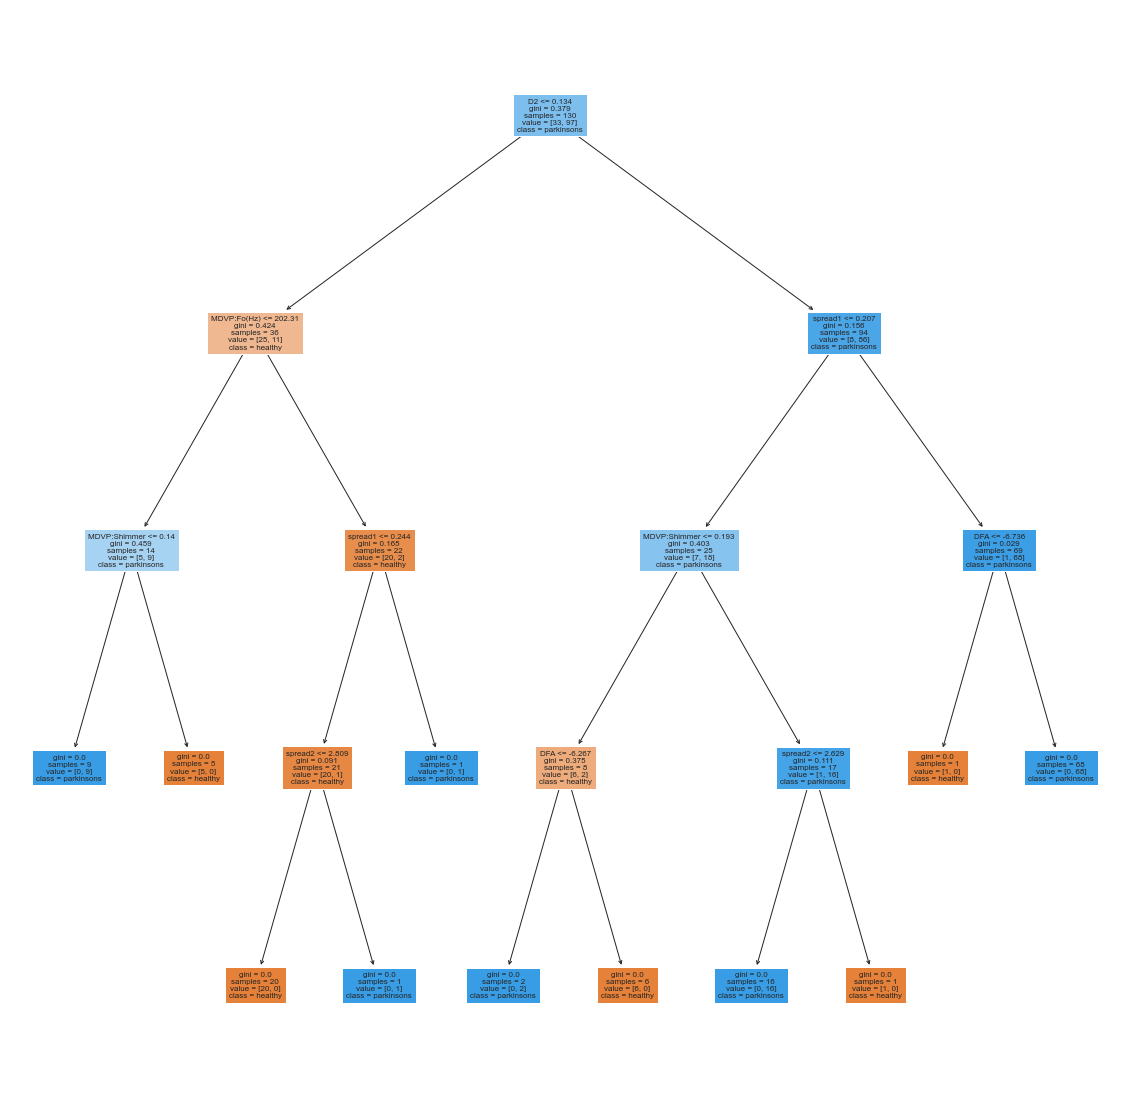

In [75]:
#This is an interesting visualization of the decision tree where the algorith can draw a tree based on the algorithm

from sklearn import tree
plt.figure(figsize=(20, 20))
tree.plot_tree(dt,filled=True,
              feature_names=parkinsons.columns[2:],
              class_names=['healthy', 'parkinsons'],
              fontsize=8)  
plt.savefig('parkinsons.png',format='png')

In the decision tree above it can be clearly seen that spread2 is once defined in class healthy and once in parkinsons which
in my opinion is wrong and can raise confusion


In [79]:
#Appending scores in summary table
dtsummary = {'Name':'Decision Tree','Training accuracy':dt_score_train,'Testing accuracy':dt_score_test}
summary = summary.append(dtsummary, ignore_index=True)

# Support Vector Machine (SVM)

In [76]:
#initialize the model
svm = SVC(kernel='rbf')
# fit the model on the train data
svm.fit(X_train, y_train)

SVC()

Accuracy of SVM on train set 0.794
Accuracy of SVM on test set 0.878

[[ 5  6]
 [ 0 38]]
              precision    recall  f1-score   support

           0       1.00      0.45      0.62        11
           1       0.86      1.00      0.93        38

    accuracy                           0.88        49
   macro avg       0.93      0.73      0.78        49
weighted avg       0.89      0.88      0.86        49



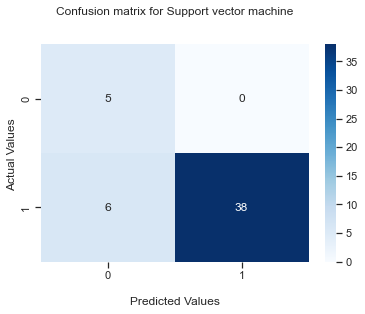

In [77]:
# calculate accuracy score on train data
svm_score_train = svm.score(X_train, y_train)
print(f'Accuracy of SVM on train set {svm_score_train:.3f}')

# calculate accuracy score on test data
svm_score_test = svm.score(X_test, y_test)
print(f'Accuracy of SVM on test set {svm_score_test:.3f}')
print('')
y_pred = svm.predict(X_test)
evaluate(y_test, y_pred, X_test, svm)

ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='Blues')

ax.set_title('Confusion matrix for Support vector machine\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

test  acc: 0.8775510204081632
train acc: 0.7938931297709924


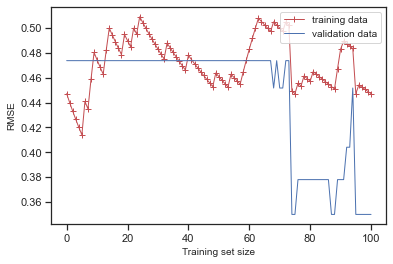

In [80]:
plot_learning_curves(svm, X_train, y_train, X_test, y_test)

Support Vector machines should be used when we have defined bouadaries between features. It does not perform well when the dataset
features are overlapping as in our case. Jitter, aplitude and shimmer are overlapping features and co-related. It works best 
for multiclass classification problems.

This model has a recall of 1.0 which is again not good and accuracy lower than Linear regression and decision tree model.
For our dataset this is not a good choice.

The larning curve also shows overfitting from the beginning


In [81]:
#Appending scores in summary table
svmsummary = {'Name':'SVM','Training accuracy':svm_score_train,'Testing accuracy':svm_score_test}
summary = summary.append(svmsummary, ignore_index=True)

# Naive Bayes

In [82]:
#initialize the model
gnb = GaussianNB()
# fit the model on the train data
gnb.fit(X_train, y_train)

GaussianNB()

Accuracy of Naive Bayes on train set 0.695
Accuracy of Naive Bayes on test set 0.633

[[11  0]
 [18 20]]
              precision    recall  f1-score   support

           0       0.38      1.00      0.55        11
           1       1.00      0.53      0.69        38

    accuracy                           0.63        49
   macro avg       0.69      0.76      0.62        49
weighted avg       0.86      0.63      0.66        49



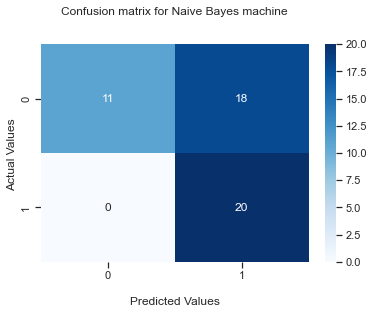

In [83]:
# calculate accuracy score on train data
gnb_score_train = gnb.score(X_train, y_train)
print(f'Accuracy of Naive Bayes on train set {gnb_score_train:.3f}')

# calculate accuracy score on test data
gnb_score_test = gnb.score(X_test, y_test)
print(f'Accuracy of Naive Bayes on test set {gnb_score_test:.3f}')
print('')
y_pred = gnb.predict(X_test)
evaluate(y_test, y_pred, X_test, gnb)

ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='Blues')

ax.set_title('Confusion matrix for Naive Bayes machine\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

test  acc: 0.6326530612244898
train acc: 0.6870229007633588


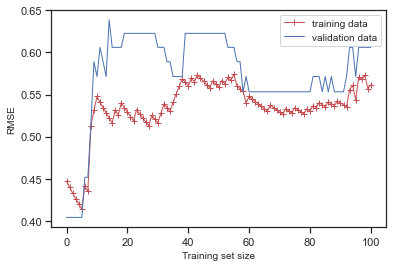

In [84]:
plot_learning_curves(gnb, X_train, y_train, X_test, y_test)

Naive Bayes works best with text classification. It is a probability calssifier and predics based on th epredictibilty
of an object. Initially the model starts to learn well but then it starts overfitting after just 6-7 training data. But it does
start to converge after sbout 60, so it might be possible that it will work on a dataset greater in size.

On the other hand it has a precision of 1.0 which is not good, and when we  see the accuracy it is 0.63 which is the worst 
performing model up until now.


In [85]:
gnbsummary = {'Name':'Naive Bayes','Training accuracy':gnb_score_train,'Testing accuracy':gnb_score_test}
summary = summary.append(gnbsummary, ignore_index=True)

# Ensemble learning

# Random Forest

In [113]:
#initialize the model
rf = RandomForestClassifier(n_estimators = 10)
#fit the model
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

Accuracy of Random Forest on train set 1.000
Accuracy of Random Forest on test set 0.959

[[11  0]
 [ 2 36]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       1.00      0.95      0.97        38

    accuracy                           0.96        49
   macro avg       0.92      0.97      0.94        49
weighted avg       0.97      0.96      0.96        49



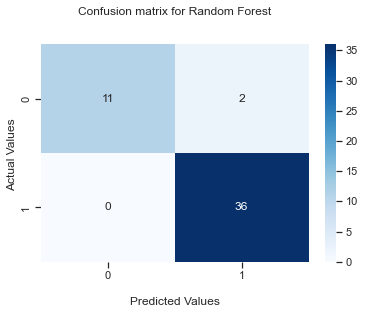

In [114]:
# calculate accuracy score on train data
rf_score_train = rf.score(X_train, y_train)
print(f'Accuracy of Random Forest on train set {rf_score_train:.3f}')

# calculate accuracy score on test data
rf_score_test = rf.score(X_test, y_test)
print(f'Accuracy of Random Forest on test set {rf_score_test:.3f}')
print('')
y_pred = rf.predict(X_test)
evaluate(y_test, y_pred, X_test, rf)

ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='Blues')

ax.set_title('Confusion matrix for Random Forest\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

test  acc: 0.8571428571428571
train acc: 0.9923664122137404


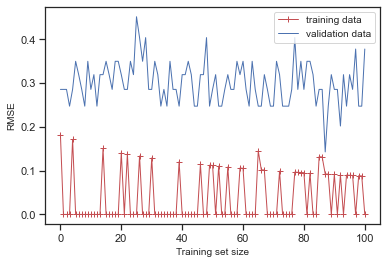

In [115]:
plot_learning_curves(rf, X_train, y_train, X_test, y_test)

Random forest algorithm can be used for both classifications and regression task. It provides higher accuracy through
cross validation. But one most important detail is Random Forest is a data hungry algorith so using it in a small dataset
is a wrong choice. It creates multiple decision tree and based on that provides a result. As I have already explained
why decision tree is a bad idea, same goes for random forest.

This model has a precision of 1.0 which means it has got a lot of false negative. The accuracy of 0.96 is good but as can be
seen from the plot there is a lot of overfitting and it is not converging at all. So, for parkinsons prediction it is not at
all a good choice of model.


In [116]:
rfsummary = {'Name':'Random Forest','Training accuracy':rf_score_train,'Testing accuracy':rf_score_test}
summary = summary.append(rfsummary, ignore_index=True)

# Bagging with Decicion Tree classifier

In [123]:
#initialize the model
bg = BaggingClassifier(DecisionTreeClassifier(), max_features = 1.0, max_samples = 0.5) 
#fit the model
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5)

Accuracy of Bagging with DecisionTree on train set 0.969
Accuracy of Bagging with DecisionTree on test set 0.939

[[10  1]
 [ 2 36]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.97      0.95      0.96        38

    accuracy                           0.94        49
   macro avg       0.90      0.93      0.91        49
weighted avg       0.94      0.94      0.94        49



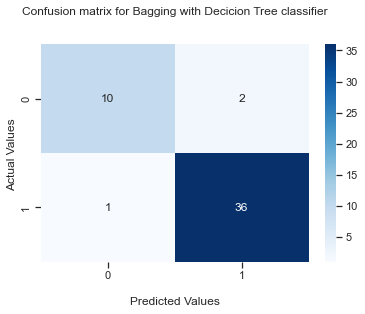

In [124]:
# calculate accuracy score on train data
bg_score_train = bg.score(X_train, y_train)
print(f'Accuracy of Bagging with DecisionTree on train set {bg_score_train:.3f}')

# calculate accuracy score on test data
bg_score_test = bg.score(X_test, y_test)
print(f'Accuracy of Bagging with DecisionTree on test set {bg_score_test:.3f}')
print('')
y_pred = bg.predict(X_test)
evaluate(y_test, y_pred, X_test, bg)

ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='Blues')

ax.set_title('Confusion matrix for Bagging with Decicion Tree classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

test  acc: 0.8979591836734694
train acc: 0.9541984732824428


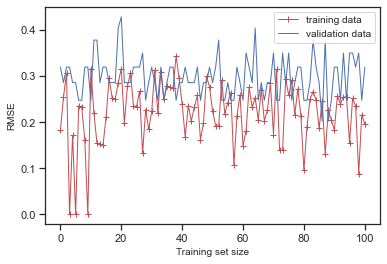

In [125]:
plot_learning_curves(bg, X_train, y_train, X_test, y_test)

Bagging is a way to decrease the variance in the prediction by generating additional data for training from 
dataset using combinations with repetitions to produce multi-sets of the original data. In bagging we are using all features
in comparison with random forest where we are using a subset of features.

This model has an accuracy of 0.94 and a precision of 0.97, recall of 0.95 and an f1-score of 0.96 which is a good score overall.
The learning curve also shows better results where training data and validation data might converge but there is a lot 
of overfitting. But after around 10 records it might perform better.


In [126]:
bgsummary = {'Name':'Bagging with Decicion Tree','Training accuracy':bg_score_train,'Testing accuracy':bg_score_test}
summary = summary.append(bgsummary, ignore_index=True)

# Bagging with KNeighbors Classifier

In [133]:
#initialize the model
bagging = BaggingClassifier(KNeighborsClassifier(),
                             max_samples=0.5, max_features=0.5)
#fit the model
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=0.5,
                  max_samples=0.5)

Accuracy of Bagging with KNeighbors Classifier on train set 0.878
Accuracy of Bagging with KNeighbors Classifier on test set 0.939

[[ 8  3]
 [ 0 38]]
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.93      1.00      0.96        38

    accuracy                           0.94        49
   macro avg       0.96      0.86      0.90        49
weighted avg       0.94      0.94      0.94        49



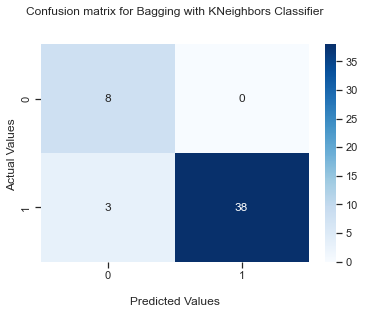

In [134]:
# calculate accuracy score on train data
bagging_score_train = bagging.score(X_train, y_train)
print(f'Accuracy of Bagging with KNeighbors Classifier on train set {bagging_score_train:.3f}')

# calculate accuracy score on test data
bagging_score_test = bagging.score(X_test, y_test)
print(f'Accuracy of Bagging with KNeighbors Classifier on test set {bagging_score_test:.3f}')
print('')
y_pred = bagging.predict(X_test)
evaluate(y_test, y_pred, X_test, bagging)

ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='Blues')

ax.set_title('Confusion matrix for Bagging with KNeighbors Classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

test  acc: 0.8979591836734694
train acc: 0.8473282442748091


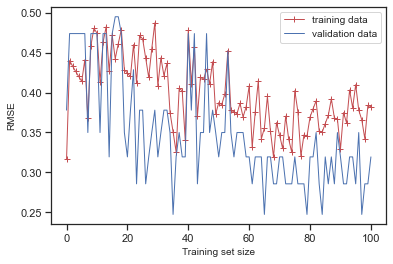

In [135]:
plot_learning_curves(bagging, X_train, y_train, X_test, y_test)

Bagging with knn has better accuracy as compared to previous model i.e. 0.94 and a precision of 0.93. But yet again a recall of
1.0 which is not good. But in terms of the learning curve we can see overlap which is good and if we use a larger dataset
or use a smoothing algorithm for the plots it might give better results.

In [136]:
bgksummary = {'Name':'Bagging with K KNeighbors','Training accuracy':bagging_score_train,'Testing accuracy':bagging_score_test}
summary = summary.append(bgksummary, ignore_index=True)

# Boosting

In [137]:
#initialise the model
adb = AdaBoostClassifier(LogisticRegression(), n_estimators = 22, learning_rate = 1)
#fit the model
adb.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(), learning_rate=1,
                   n_estimators=22)

Accuracy of Ada Boosting on train set 0.85
Accuracy of Ada Boosting on test set 0.92

[[ 8  3]
 [ 1 37]]
              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.93      0.97      0.95        38

    accuracy                           0.92        49
   macro avg       0.91      0.85      0.87        49
weighted avg       0.92      0.92      0.92        49



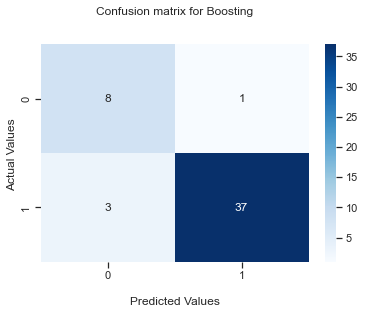

In [138]:
# calculate accuracy score on train data
adb_score_train = adb.score(X_train, y_train)
print(f'Accuracy of Ada Boosting on train set {adb_score_train:.2f}')

# calculate accuracy score on test data
adb_score_test = adb.score(X_test, y_test)
print(f'Accuracy of Ada Boosting on test set {adb_score_test:.2f}')
print('')
y_pred = adb.predict(X_test)
evaluate(y_test, y_pred, X_test, adb)

ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='Blues')

ax.set_title('Confusion matrix for Boosting\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

test  acc: 0.9183673469387755
train acc: 0.8549618320610687


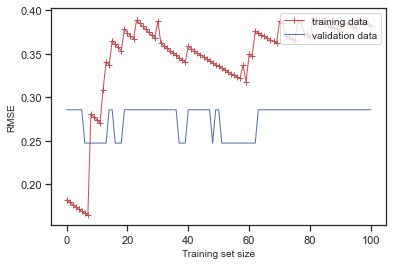

In [139]:
plot_learning_curves(adb, X_train, y_train, X_test, y_test)

For our dataset even if the model has reached an accuracy of 0.92 it does not perform well if we see the learning curve. 
After around 5 it starts to overfit. I have used a Logistic Regression classifier for boosting. It might be possible that 
if any other classifier is used it might give better results.

In [140]:
adbsummary = {'Name':'Ada Boosting','Training accuracy':adb_score_train,'Testing accuracy':adb_score_test}
summary = summary.append(adbsummary, ignore_index=True)

# Stacking

In [141]:
#initialise the model
estimators = [('dt', dt), ('lg',lg), ('svm', svm), ('gnb', gnb)]
#fit the model
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sclf.fit(X_train, y_train)

StackingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                               ('lg', LogisticRegression(random_state=0)),
                               ('svm', SVC()), ('gnb', GaussianNB())],
                   final_estimator=LogisticRegression())

Accuracy of Stacking on train set 0.931
Accuracy of Stacking on test set 0.939

[[ 8  3]
 [ 0 38]]
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.93      1.00      0.96        38

    accuracy                           0.94        49
   macro avg       0.96      0.86      0.90        49
weighted avg       0.94      0.94      0.94        49



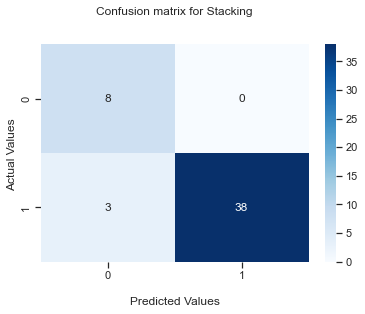

In [142]:
# calculate accuracy score on train data
sclf_score_train = sclf.score(X_train, y_train)
print(f'Accuracy of Stacking on train set {sclf_score_train:.3f}')

# calculate accuracy score on test data
sclf_score_test = sclf.score(X_test, y_test)
print(f'Accuracy of Stacking on test set {sclf_score_test:.3f}')
print('')
y_pred = sclf.predict(X_test)
evaluate(y_test, y_pred, X_test, sclf)

ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='Blues')

ax.set_title('Confusion matrix for Stacking\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

test  acc: 0.8775510204081632
train acc: 0.9770992366412213


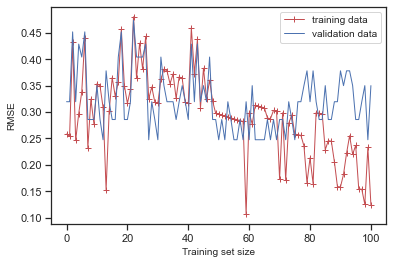

In [143]:
plot_learning_curves(sclf, X_train, y_train, X_test, y_test)

Stacking refers to a method of joining the machine learning models, similar to arranging a stack of plates.
Output of many models are combined and it is implemented to create a model. It is said that th eperformance is sometimes
best as compared to individual models. In our case we have an accuracy of 0.94 with a precision of 0.93, recall of 1.00 and 
f1-score of 0.93. All these scores point to a good model.

The learning curve plot also seem to converge and less overfit as compared to other models. After about 60 the training data
starts to overfit.

It does take a little bit longer time to execute.


In [144]:
sclfsummary = {'Name':'Stacking','Training accuracy':sclf_score_train,'Testing accuracy':sclf_score_test}
summary = summary.append(sclfsummary, ignore_index=True)

# Gradient Boosting

In [145]:
#initialise the model
grad = GradientBoostingClassifier(random_state=0)
#fit the model
grad.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

Accuracy of Gradient Boosting on train set 1.00
Accuracy of Gradient Boosting on test set 0.94

[[11  0]
 [ 3 35]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.92      0.96        38

    accuracy                           0.94        49
   macro avg       0.89      0.96      0.92        49
weighted avg       0.95      0.94      0.94        49



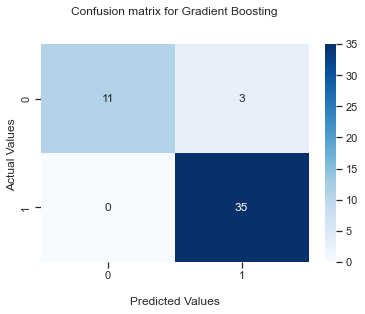

In [146]:
# calculate accuracy score on train data
grad_score_train = grad.score(X_train, y_train)
print(f'Accuracy of Gradient Boosting on train set {grad_score_train:.2f}')

# calculate accuracy score on test data
grad_score_test = grad.score(X_test, y_test)
print(f'Accuracy of Gradient Boosting on test set {grad_score_test:.2f}')
print('')
y_pred = grad.predict(X_test)
evaluate(y_test, y_pred, X_test, grad)

ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='Blues')

ax.set_title('Confusion matrix for Gradient Boosting\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

test  acc: 0.9591836734693877
train acc: 1.0


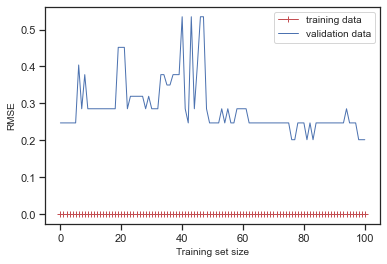

In [147]:
plot_learning_curves(grad, X_train, y_train, X_test, y_test)

Gradient Boosting works well along with Decision trees. Although the model has an accuracy of 0.94 it has a precision of 1.0 
which means it has lot of false positives. Also, as mentioned earlier as Decision tree did not work well I assumed that gradient
boosting will give certainly bad results which is evident from the learning curve.

In [148]:
gradsummary = {'Name':'Gradient Boosting','Training accuracy':grad_score_train,'Testing accuracy':grad_score_test}
summary = summary.append(gradsummary, ignore_index=True)

# Voting classifier

In [149]:
#initilize the model
evc = VotingClassifier(estimators = [('dt', dt), ('lg',lg), ('svm', svm)], voting = 'hard')
#fit the model
evc.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('lg', LogisticRegression(random_state=0)),
                             ('svm', SVC())])

Accuracy of Voting classifier on train set 0.89
Accuracy of Voting classifier on test set 0.94

[[ 8  3]
 [ 0 38]]
              precision    recall  f1-score   support

           0       1.00      0.73      0.84        11
           1       0.93      1.00      0.96        38

    accuracy                           0.94        49
   macro avg       0.96      0.86      0.90        49
weighted avg       0.94      0.94      0.94        49



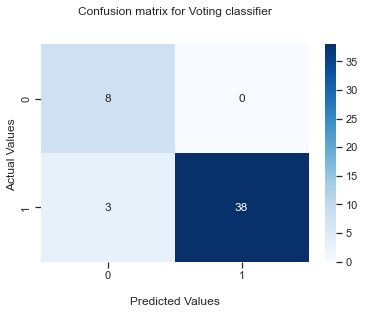

In [150]:
# calculate accuracy score on train data
evc_score_train = evc.score(X_train, y_train)
print(f'Accuracy of Voting classifier on train set {evc_score_train:.2f}')

# calculate accuracy score on test data
evc_score_test = evc.score(X_test, y_test)
print(f'Accuracy of Voting classifier on test set {evc_score_test:.2f}')
print('')
y_pred = evc.predict(X_test)
evaluate(y_test, y_pred, X_test, evc)

ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='Blues')

ax.set_title('Confusion matrix for Voting classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

test  acc: 0.9183673469387755
train acc: 0.8854961832061069


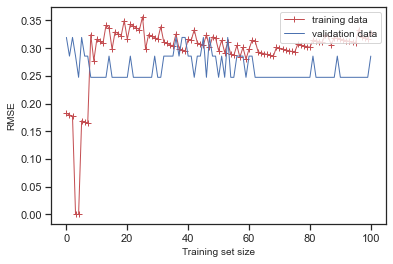

In [151]:
plot_learning_curves(evc, X_train, y_train, X_test, y_test)

Voting classifier trains on an ensemble of multiple models and then predicts the values based on the highest votes.
Our model has an accuracy of 0.94 with precision of 0.93 which is good but again a recall of 1. As can be seen it starts to
overfit form the beginning and might not be a good idea to use for the parkinsons dataset.

In [152]:
evcsummary = {'Name':'Voting Classifier','Training accuracy':evc_score_train,'Testing accuracy':evc_score_test}
summary = summary.append(evcsummary, ignore_index=True)

# MLP classifier

In [157]:
#initialise the model
mlp =  MLPClassifier(alpha=1, max_iter=1000)
#fit the model
mlp.fit(X_train, y_train)

MLPClassifier(alpha=1, max_iter=1000)

Accuracy of MLP classifier on train set 0.90
Accuracy of MLP classifier  on test set 0.88

[[ 7  4]
 [ 2 36]]
              precision    recall  f1-score   support

           0       0.78      0.64      0.70        11
           1       0.90      0.95      0.92        38

    accuracy                           0.88        49
   macro avg       0.84      0.79      0.81        49
weighted avg       0.87      0.88      0.87        49



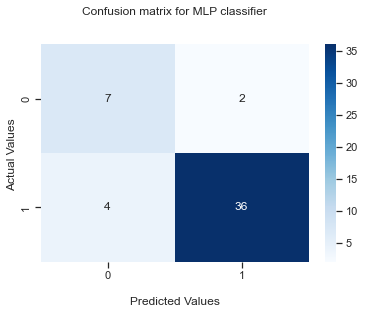

In [158]:
# calculate accuracy score on train data
mlp_score_train = mlp.score(X_train, y_train)
print(f'Accuracy of MLP classifier on train set {mlp_score_train:.2f}')

# calculate accuracy score on test data
mlp_score_test = mlp.score(X_test, y_test)
print(f'Accuracy of MLP classifier  on test set {mlp_score_test:.2f}')
print('')
y_pred = mlp.predict(X_test)
evaluate(y_test, y_pred, X_test, mlp)

ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='Blues')

ax.set_title('Confusion matrix for MLP classifier\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

test  acc: 0.7755102040816326
train acc: 0.7404580152671756


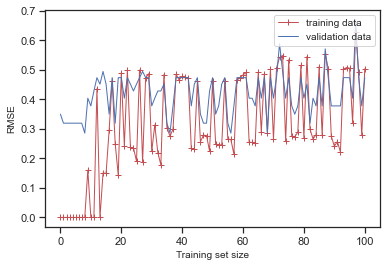

In [230]:
plot_learning_curves(mlp, X_train, y_train, X_test, y_test)

MLP classifier solves problem stochiatically. It is suitable for regression prediction problems where a value needs to be
predicted. I assumed that it will not work well and the plot shows why. It has an accuracy of 0.88 with a preciison of 0.90
, on the other hand the model is highly overfit.

In [159]:
mlpsummary = {'Name':'MLP Classifier','Training accuracy':mlp_score_train,'Testing accuracy':mlp_score_test}
summary = summary.append(mlpsummary, ignore_index=True)

# Quadratic Discriminant Analysis

In [160]:
#initilize the model
qda = QuadraticDiscriminantAnalysis()
#fit the model
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

Accuracy of QuadraticDiscriminantAnalysis on train set 1.000
Accuracy of QuadraticDiscriminantAnalysis on test set 0.898

[[ 8  3]
 [ 2 36]]
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       0.92      0.95      0.94        38

    accuracy                           0.90        49
   macro avg       0.86      0.84      0.85        49
weighted avg       0.90      0.90      0.90        49



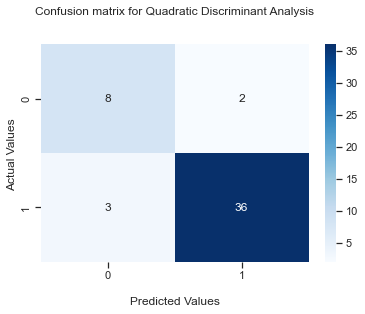

In [161]:
# calculate accuracy score on train data
qda_score_train = qda.score(X_train, y_train)
print(f'Accuracy of QuadraticDiscriminantAnalysis on train set {qda_score_train:.3f}')

# calculate accuracy score on test data
qda_score_test = qda.score(X_test, y_test)
print(f'Accuracy of QuadraticDiscriminantAnalysis on test set {qda_score_test:.3f}')
print('')
y_pred = qda.predict(X_test)
evaluate(y_test, y_pred, X_test, qda)

ax = sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, cmap='Blues')

ax.set_title('Confusion matrix for Quadratic Discriminant Analysis\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

test  acc: 0.8775510204081632
train acc: 0.9847328244274809


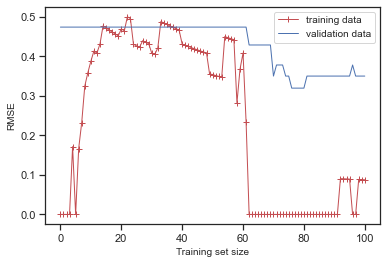

In [162]:
plot_learning_curves(qda, X_train, y_train, X_test, y_test)

I tried this method just to check how it performs. The resources says it is good to find a non-linear boundary between classifiers
The parkinsons dataset does not have the same so I assume it is not a good model

In [163]:
qdasummary = {'Name':'QuadraticDiscriminantAnalysis','Training accuracy':qda_score_train,'Testing accuracy':qda_score_test}
summary = summary.append(qdasummary, ignore_index=True)

# Summary of the methods

In [166]:
summary

Name  Training accuracy  Testing accuracy
0             Logistic Regression           0.862595          0.938776
1                   Decision Tree           1.000000          0.918367
2                             SVM           0.793893          0.877551
3                     Naive Bayes           0.694656          0.632653
4                   Random Forest           1.000000          0.959184
5      Bagging with Decicion Tree           0.969466          0.938776
6       Bagging with K KNeighbors           0.877863          0.938776
7                    Ada Boosting           0.854962          0.918367
8                        Stacking           0.931298          0.938776
9               Gradient Boosting           1.000000          0.938776
10              Voting Classifier           0.893130          0.938776
11                 MLP Classifier           0.900763          0.877551
12  QuadraticDiscriminantAnalysis           1.000000          0.897959

# Final Conclusion

For the parkinson's dataset, Bagging with KNN neighbour, Bagging with decision tree or Stacking works the best. It is evident from the summary table as well. However, I do feel that for creating a near perfect machine learning model there might be a need of a bigger dataset for training purpose.